# Project: Police Shooting Data Visualization

## Introduction

The death of George Floyd due to police brutality on May 25th, 2020 had ignited public rage and concerns. Indeed, police brutality has long been a highly controversial and an agonizing problem in the U.S. In the spirit of the recent event, I thought it might worth it to test my  data visualization skills on this police shooting dataset that I gathered on Kaggle.

### Questions Posed:

Here I presented some questions about the dataset that worth answering:
* What is the distribution of age of those who were shot like? Compare the distribution of age among different races.
* Is there a race that is targeted the most, or is there a racial bias associated with police shootings?
* In which state does police shootings occur most frequently? (i.e., what are the most dangerous states?)
* Is there an increasing trend of shootings incidents?
* What are the most popular weapons of choice?
* For those who are unarmed, what caused their death? (i.e. Did they attack the police?)

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from functools import reduce
color = sns.cubehelix_palette(8, start=.8, rot=-.8)

sns.set()
%matplotlib inline 

## Dataset Overview

In [9]:
pk = pd.read_csv('data/PoliceKillingsUS.csv', encoding = "ISO-8859-1")
pk.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [10]:
pk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

In [11]:
pk.describe()

,id,age
count,2535.000000,2458.000000
mean,1445.731755,36.605370
std,794.259490,13.030774
min,3.000000,6.000000
25%,768.500000,26.000000
50%,1453.000000,34.000000
75%,2126.500000,45.000000
max,2822.000000,91.000000


**Conclusions:** This is insane.. It strikes me when I look at this describe summary. The youngest victim is 6 years old and the oldest victim is 91... I can't imagine what happened to them.

## Data Wrangling

In this section, I dropped the fields with nulls and duplicates, and fixed the datatypes.

In [12]:
pk.dropna(inplace=True)
pk.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [13]:
sum(pk.duplicated())

0

I argue that columns 'manner_of_death', 'gender', 'race', 'state', 'threat_level' and 'flee' should be categorical variables as opposed to string. Also, age should be converted to integer and date should be converted to datetime object for easier manipulations.

In [14]:
pk['age'] = pk['age'].astype(int)

In [15]:
pk['manner_of_death'] = pk['manner_of_death'].astype('category')
pk['gender'] = pk['gender'].astype('category')
pk['race'] = pk['race'].astype('category')
pk['state'] = pk['state'].astype('category')
pk['threat_level'] = pk['threat_level'].astype('category')
pk['flee'] = pk['flee'].astype('category')

In [16]:
pk['date'] = pd.to_datetime(pk['date'])

In [17]:
pk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2254 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       2254 non-null   int64         
 1   name                     2254 non-null   object        
 2   date                     2254 non-null   datetime64[ns]
 3   manner_of_death          2254 non-null   category      
 4   armed                    2254 non-null   object        
 5   age                      2254 non-null   int64         
 6   gender                   2254 non-null   category      
 7   race                     2254 non-null   category      
 8   city                     2254 non-null   object        
 9   state                    2254 non-null   category      
 10  signs_of_mental_illness  2254 non-null   bool          
 11  threat_level             2254 non-null   category      
 12  flee                     2254 non-

## Exploratory Data Analysis

### Key points to focus on for this EDA:

> - The vast majority of the victims are males.
> - Caucasians seem to have the highest number of deaths due to police shootings.
> - Most of the victims did not have signs of mental illness, however, there is still a considerable amount of victims who had signs of mental illness that were shot. 
> - Most of the victims attack the police before they were shot.
> - most of the victims were not fleeing before they got shot, I supposed this is because they were fighting the police.
> - Not a lot of footage was recorded of the shootings.

In [18]:
numerical = ['age']
categorical = ['gender', 'race', 'signs_of_mental_illness', 
               'threat_level', 'flee', 'body_camera']

df = pk[numerical + categorical]
df.shape

(2254, 7)

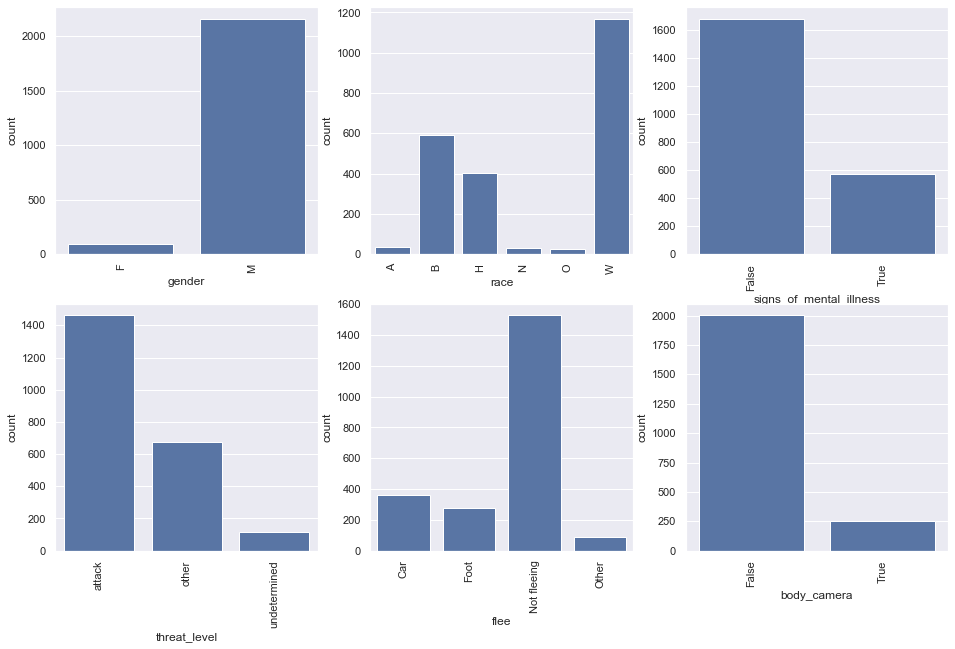

In [19]:
base_color = sns.color_palette()[0]

fig, ax = plt.subplots(2, 3, figsize=(16, 10))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(df[variable], ax=subplot, color=base_color)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

## Explanatory Visualizations

### What is the most dangerous state?

It appears that the 3 most dangerous states are California, Texas and Florida, since they have the most police shootings. The most dangerous state appears to be California.

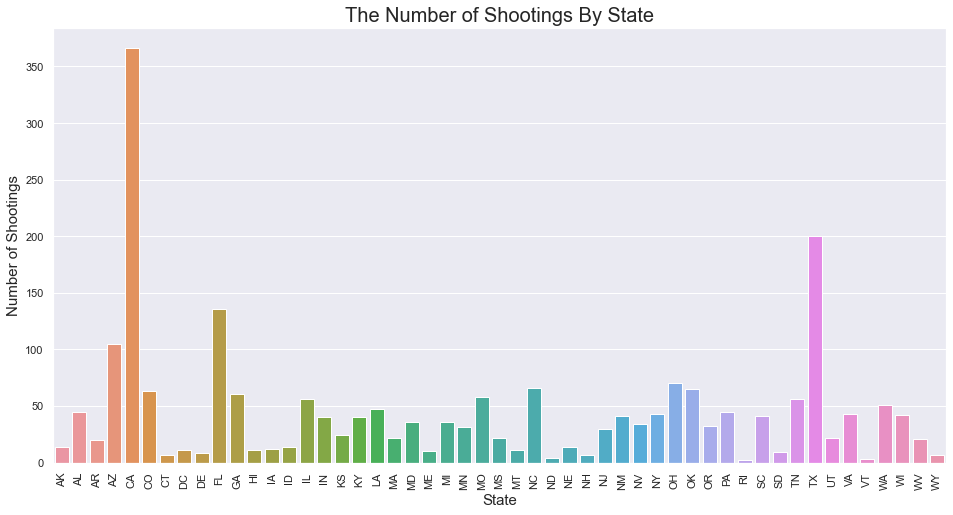

In [22]:
plt.figure(figsize=[16,8])
sns.countplot(data=pk, x='state')
plt.xlabel("State", fontsize=15)
plt.ylabel("Number of Shootings", fontsize=15)
plt.title('The Number of Shootings By State', fontsize=20)
plt.xticks(rotation=90)
plt.show()

### The Distribution of Ages

From this first histogram, we can see that the distribution is highly skewed, and it seems that most of the deaths occur within the age range of 20s to 30s. 

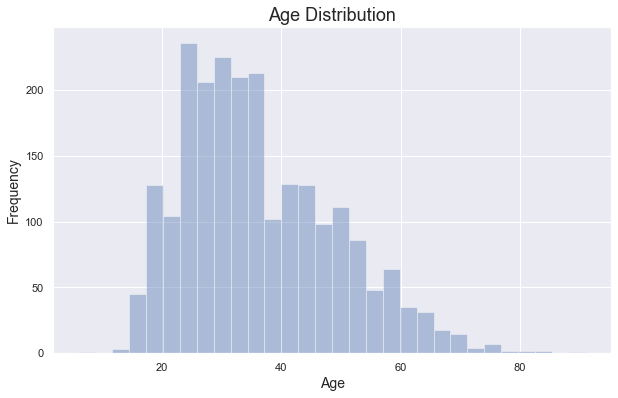

In [27]:
plt.figure(figsize=[10,6])
sns.distplot(pk['age'], bins=30, kde=False)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.title("Age Distribution", fontsize=18)
plt.show()

For this second histogram, I plotted the age distribution of the 3 races with the most victims, which are whites, blacks and hispanics. The histogram reveals a more skewed shape for both the hispanics and the blacks. Most of the deaths for these two groups appear to be within the range of 20s to early 40s, wheras the number of deaths appear to be more even across the age groups for the caucasians.

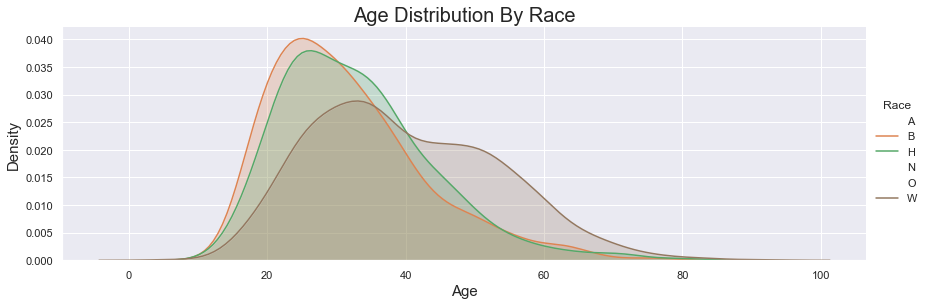

In [31]:
# We are only investigating the races that had the highest cases of shootings, which are black, white and hispanics
races = pk.loc[(pk["race"] == "B") | (pk["race"] == "W") | (pk["race"] == "H")]

g = sns.FacetGrid(data = races, hue = 'race', aspect=3, height=4)
g.map(sns.kdeplot, "age", shade=True)
g.add_legend(title="Race")
g.set_xlabels("Age", fontsize=15)
g.set_ylabels("Density", fontsize=15)
plt.title("Age Distribution By Race", fontsize=20)
plt.show()

### Is there a racial bias involved?

On the left, we have a bar chart that is the same as the one in EDA that I demonstrated earlier. Our conclusion was that caucasians seem to have the highest number of deaths due to police shootings. However, when I re-plot the bar chart using a new variable, the proportions, I obtained a different chart (I calculated the proportions by dividing the number of deaths per race over the total population of each corresponding race in the U.S.) I found that African Americans actually had the highest proportion of victims, and then interstingly, Native Americans rank second while the Hispanics followed.

In [32]:
race = pk.race.value_counts(ascending=False)
df_race = pk.filter(["race"], axis=1)
df_race["count"] = 1

grouped_race = df_race.groupby("race", as_index=False).sum()
grouped_race.sort_index(ascending=False)

grouped_race

,race,count
0,A,36
1,B,592
2,H,401
3,N,29
4,O,28
5,W,1168


In [33]:
# appending a new column of population of each race
population = [17186320, 40610815, 56510571, 2632102, 15553808, 234370202]
grouped_race['population'] = population

# obtain a percentage
grouped_race['percentage'] = grouped_race['count']/grouped_race['population']

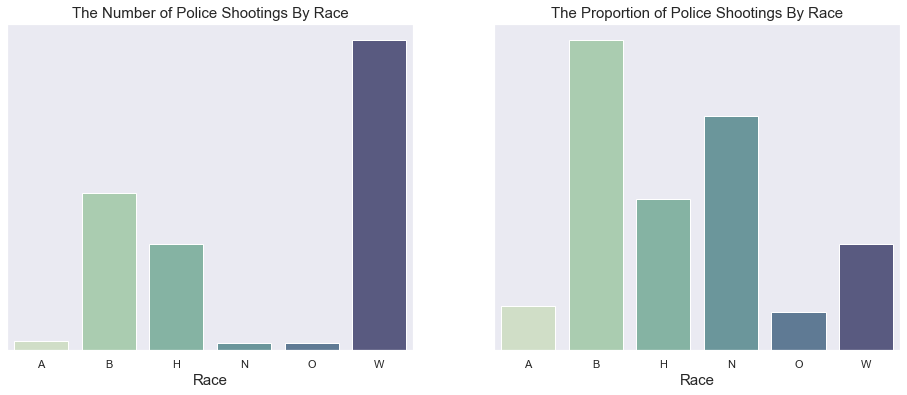

In [34]:
plt.figure(figsize=[16,6])

plt.subplot(1,2,1)
sns.barplot(data=grouped_race, x='race', y='count', palette=color)
plt.title('The Number of Police Shootings By Race', fontsize=15)
plt.xlabel("Race", fontsize=15)
plt.yticks([])
plt.ylabel('')

plt.subplot(1,2,2)
sns.barplot(data=grouped_race, x='race', y='percentage', palette=color)
plt.title('The Proportion of Police Shootings By Race', fontsize=15)
plt.xlabel("Race", fontsize=15)
plt.yticks([])
plt.ylabel('')
plt.show()

### Weapon Choice

Guns and Knifes appear to be two of the most popular weapons, which is not suprising. However, there were actually quite an amount of victims that were unarmed, just like George Floyd.

In [35]:
armed = pk.race.value_counts(ascending=False)
df_armed = pk.filter(["armed"], axis=1)
df_armed["count"] = 1

grouped_armed = df_armed.groupby("armed", as_index=False).sum()
grouped_armed.sort_index(ascending=True)
grouped_armed = grouped_armed.sort_values('count', ascending=False).head(10)

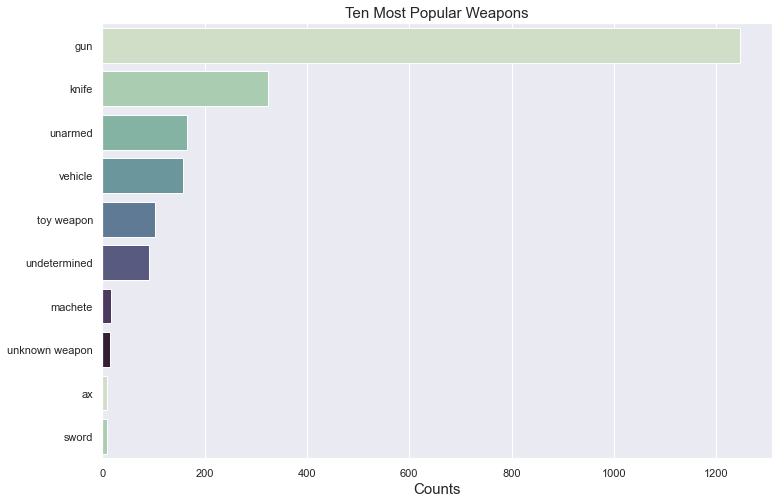

In [36]:
plt.figure(figsize=[12,8])
sns.barplot(data=grouped_armed, y='armed', x='count', palette=color)
plt.title('Ten Most Popular Weapons', fontsize=15)
plt.xlabel("Counts", fontsize=15)
plt.ylabel('')
plt.show()

### Is there an increasing trend in police shootings?

Though it may seem comforting that the number of police shootings exhibited a decreasing trend, this dataset is limited since it only includes data from 2015-2017, and that this is not sufficient to draw any valid conclusions. 

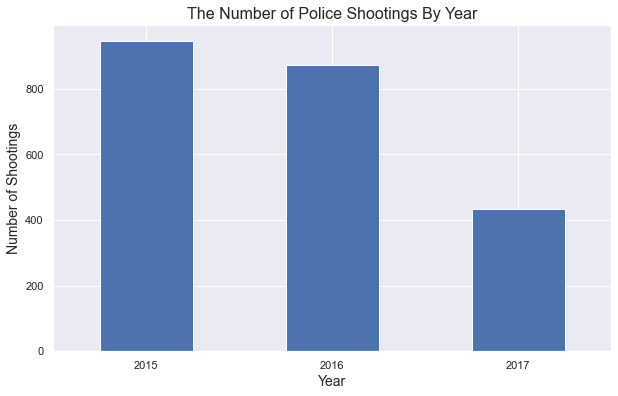

In [37]:
plt.figure(figsize=[10,6])

pk.groupby(pk.date.dt.year).count()['id'].plot(kind='bar')
plt.title('The Number of Police Shootings By Year', fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.xticks(rotation=0)
plt.ylabel("Number of Shootings", fontsize=14)
plt.show()

### Digging deeper into those who were unarmed

We can see that there were actually more victims with threat level other than attack across all races besides Asians.

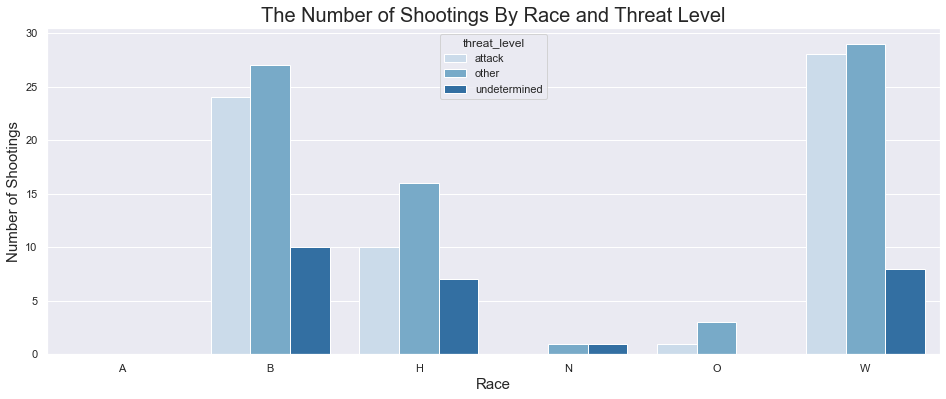

In [38]:
plt.figure(figsize=[16,6])

unarmed = pk.query('armed == "unarmed"')
sns.countplot(x='race', data=unarmed, hue='threat_level', palette='Blues')
plt.title('The Number of Shootings By Race and Threat Level', fontsize=20)
plt.xlabel("Race", fontsize=15)
plt.ylabel("Number of Shootings", fontsize=15)
plt.show()

The second plot here suggests that for those who were unarmed, no body footages were recorded across all races besides Asians.

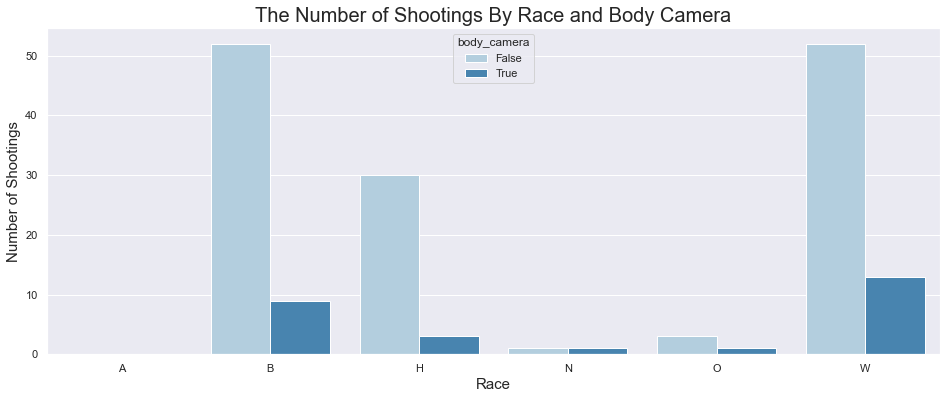

In [40]:
plt.figure(figsize=[16,6])
sns.countplot(x='race', data=unarmed, hue='body_camera', palette='Blues')
plt.title('The Number of Shootings By Race and Body Camera', fontsize=20)
plt.xlabel("Race", fontsize=15)
plt.ylabel("Number of Shootings", fontsize=15)
plt.show()

## Summary: 

There were several key insights that I discovered from visualizing this dataset. I saw, from the bar chart I created when I explored the question on racial bias, that African Americans are approximately 3 times as likely as Caucasians to be victims of police shootings. This is striking to me. 

In addition, a larger proportion of the unarmed victims seem to not possess any intentions of attacking the police, thought they eventually became victims of police shootings. What I found that is even more frightening is that across all races (besides Asians), there were no body camera footages associated with the shootings which certainly raise concerns and suspicions. What could they have possibly done that were deemed aggressive and would deserve to be shot? Imagine that there were not any footages showing George Floyd's final moments in life, would his tragedy have spurred this round of protests across the globe? Or would he simply became part of a statistic like these 165 unarmed victims, or just merely a number?

What was also chilling is that the youngest victim was only 6 years old while the oldest victim was 91 years old. Could there be any incorrect judgements on behalf of the officers that result in such tragedies?

Though it may seem comforting that the number of police shootings exhibited a decreasing trend, this dataset is limited since it only includes data from 2015-2017, and that this is not sufficient to draw any valid conclusions. I hope this visualization rings a bell to the law enforcement officers and may the deads rest in peace. 